In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [5]:
df = pd.read_csv("DataSet.csv")
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [7]:
df.shape

(824, 13)

In [8]:
df.info

<bound method DataFrame.info of           Age  Gender Occupation        Days_Indoors Growing_Stress  \
0       20-25  Female  Corporate           1-14 days            Yes   
1    30-Above    Male     Others          31-60 days            Yes   
2    30-Above  Female    Student    Go out Every day             No   
3       25-30    Male     Others           1-14 days            Yes   
4       16-20  Female    Student  More than 2 months            Yes   
..        ...     ...        ...                 ...            ...   
819     20-25    Male  Corporate    Go out Every day             No   
820     20-25    Male     Others           1-14 days            Yes   
821     20-25    Male    Student  More than 2 months            Yes   
822     16-20    Male   Business          15-30 days             No   
823  30-Above  Female     Others          15-30 days             No   

    Quarantine_Frustrations Changes_Habits Mental_Health_History  \
0                       Yes             No     

In [9]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


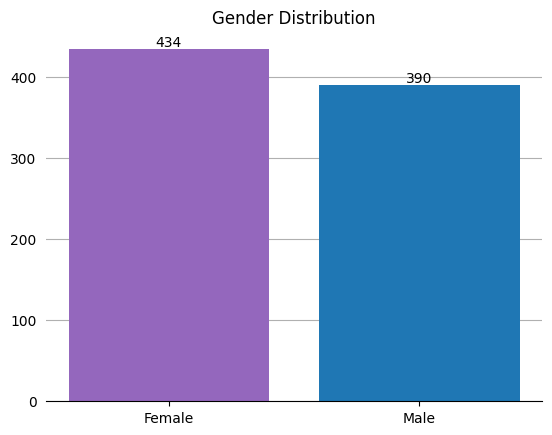

In [43]:
gender_counts=df["Gender"].value_counts()
fig,ax = plt.subplots()
bars = ax.bar(gender_counts.index,gender_counts.values,color = ["tab:purple","tab:blue"])
ax.set_title("Gender Distribution")

plt.grid(axis='y') #creates grid from y axis
ax.spines[["top","right","left"]].set_visible(False) # removes the border on top, right  and left side
ax.set_axisbelow(True) #shifts the grid lines below the bars
ax.tick_params(axis="y", which="both", left=False, right=False)#removes tick marks

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha="center", va="bottom", color="black", fontsize=10)
plt.show()


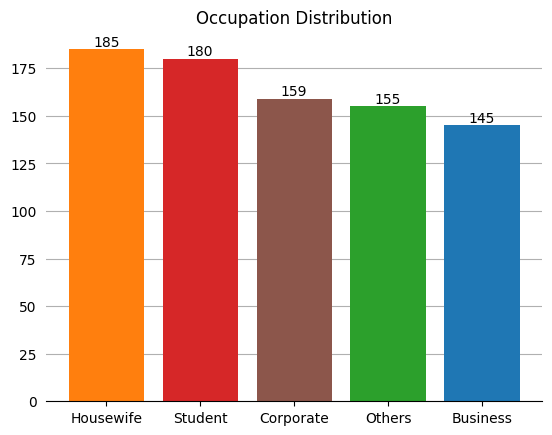

In [44]:
occupation_counts = df['Occupation'].value_counts()
colors = ["tab:orange","tab:red","tab:brown","tab:green","tab:blue"]
fig,ax = plt.subplots()
bars = ax.bar(occupation_counts.index,occupation_counts.values,color = colors)
ax.set_title("Occupation Distribution")

plt.grid(axis='y') #creates grid from y axis
ax.spines[["top","right","left"]].set_visible(False) # removes the border on top, right  and left side
ax.set_axisbelow(True) #shifts the grid lines below the bars
ax.tick_params(axis="y", which="both", left=False, right=False)#removes tick marks

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha="center", va="bottom", color="black", fontsize=10)
    
plt.show()


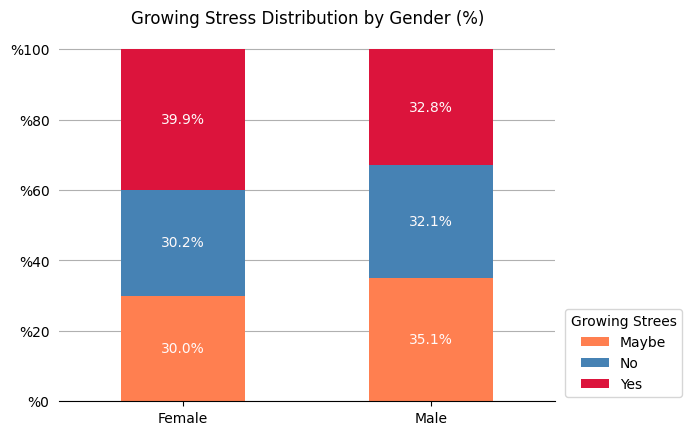

In [55]:
# Does gender and Stress have any relation?

# Create the pivot table
pivot_table = df.pivot_table(index="Gender", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by gender
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
ax.spines[["top","right","left"]].set_visible(False)# Hide frame lines
ax.set_axisbelow(True)# Place the axis below (allows grid lines to appear in front)
ax.tick_params(axis="y", which="both", left=False, right=False)# Turn off left and right tick marks on the y-axis
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Gender (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=10)

plt.show()

Lets find out the significant relationship B/W gender and stress using a hypothesis test

Hypothesis: 

H0: there is no relation between gender and stress

H1: there is relation between gender and stress

Statistical Test: 
Chi-squared test

(as we are comparing two discrete columns we use chi square test)


In [51]:
crosstab = pd.crosstab(df["Gender"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")# we can calculate p value based on chi square table
#dof = 1 (as we are having 2 classes)

if p < alpha:
    print(f"Reject the null hypothesis - Statistically significant relationship -")
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship - ")

Chi-squared value: 4.715651773036949
P-value: 0.09462572678960109
Fail to reject the null hypothesis - No statistically significant relationship - 


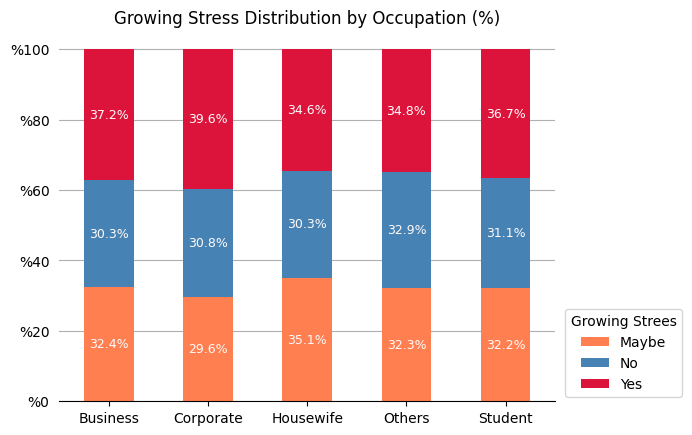

In [53]:
#does type of occupation affects the stress levels?

# Create the pivot table
pivot_table = df.pivot_table(index="Occupation", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by Occupation
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_axisbelow(True)
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Occupation (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Lets find out the significant relationship B/W occuption and stress using a hypothesis test

Hypothesis: 

H0: there is no relation between occupation and stress

H1: there is relation between occupation and stress

Statistical Test: 
Chi-squared test

(as we are comparing two discrete columns we use chi square test)

In [54]:
crosstab = pd.crosstab(df["Occupation"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"Reject the null hypothesis - Statistically significant relationship -")
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship - ")


Chi-squared value: 1.807737395115538
P-value: 0.9863493092279183
Fail to reject the null hypothesis - No statistically significant relationship - 


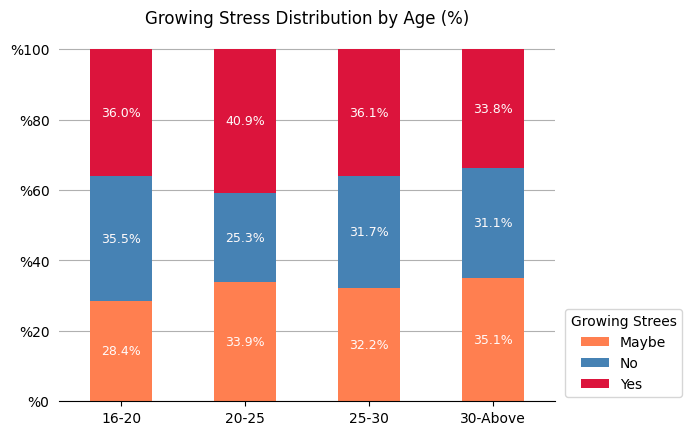

In [56]:
# Does age and stress relate?

# Create the pivot table
pivot_table = df.pivot_table(index="Age", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by Age
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Age (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Lets find out the significant relationship B/W age and stress using a hypothesis test

Hypothesis: 

H0: there is no relation between age and stress

H1: there is relation between age and stress

Statistical Test: 
Chi-squared test

(as we are comparing two discrete columns we use chi square test)

In [57]:
crosstab = pd.crosstab(df["Age"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"Reject the null hypothesis - Statistically significant relationship -")
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship- ")

Chi-squared value: 6.502951829944582
P-value: 0.36926452179802627
Fail to reject the null hypothesis - No statistically significant relationship- 


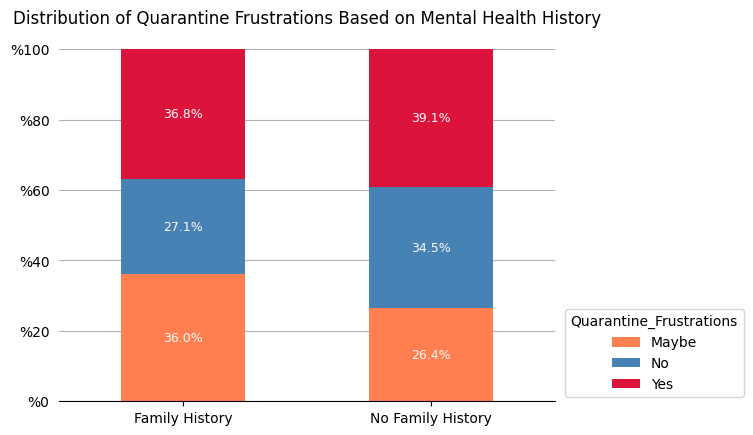

In [58]:
# Is there a significant relationship between participant's mental health history and their experience of quarantine frustrations?
category_mapping = {
    "Yes": "Family History",
    "No": "No Family History"
}
df["Mental_Health_History"] = df["Mental_Health_History"].map(category_mapping)
# Create the pivot table
pivot_table = df.pivot_table(index="Mental_Health_History", columns="Quarantine_Frustrations", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Distribution of Quarantine Frustrations Based on Mental Health History")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Quarantine_Frustrations")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0: There is no relationship between Mental Health History and Quarantine Frustrations

HA: There is a significant relationship between Mental Health History and Quarantine Frustrations

Statistical Test
Chi-squared test

In [59]:
crosstab = pd.crosstab(df["Mental_Health_History"], df["Quarantine_Frustrations"])

chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print(f"""Reject the null hypothesis - Statistically significant relationship -\n
The analysis indicates a statistically significant relationship between 
a participant's mental health history and their experience of quarantine frustrations.
This finding suggests that past mental health conditions may influence or contribute
to the level of frustration individuals experience during times of quarantine.""")
else:
    print(f"""No statistically significant relationship.Fail to reject the null hypothesis""")

Chi-squared value: 6.605925406557405
P-value: 0.03677405523355191
Reject the null hypothesis - Statistically significant relationship -

The analysis indicates a statistically significant relationship between 
a participant's mental health history and their experience of quarantine frustrations.
This finding suggests that past mental health conditions may influence or contribute
to the level of frustration individuals experience during times of quarantine.


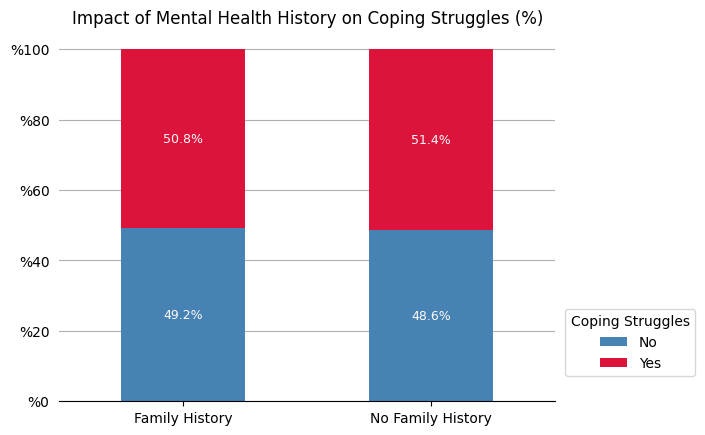

In [60]:
# Do individuals with a history of mental health issues struggle more with coping daily problems?

# Create the pivot table
pivot_table = df.pivot_table(index="Mental_Health_History", columns="Coping_Struggles", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Impact of Mental Health History on Coping Struggles (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Coping Struggles")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0: There is no relationship between Mental Health History and Coping Struggles

HA: There is a significant relationship between Mental Health History and Coping Struggles

Statistical Test
Chi-squared test

In [61]:
crosstab = pd.crosstab(df["Mental_Health_History"], df["Coping_Struggles"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"Reject the null hypothesis - Statistically significant relationship -")
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship - ")

Chi-squared value: 0.0037536192316119433
P-value: 0.9511467409527915
Fail to reject the null hypothesis - No statistically significant relationship - 


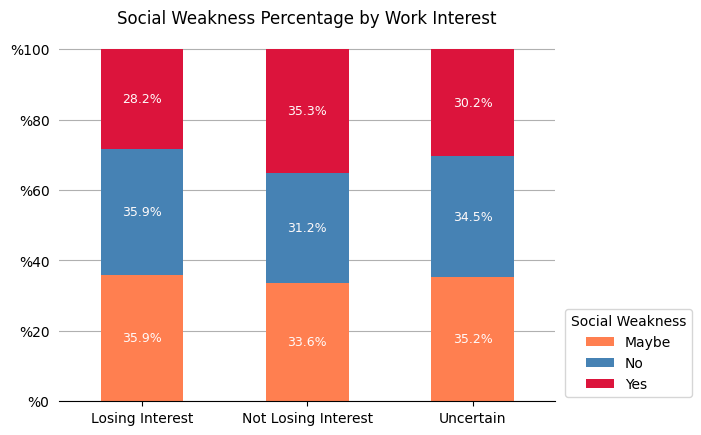

In [62]:
# Do individuals losing interest in work also feel more mentally weak in social interactions?

work_interest_mapping = {
    "Yes": "Losing Interest",
    "Maybe": "Uncertain",
    "No": "Not Losing Interest"
}
df["Work_Interest"] = df["Work_Interest"].map(work_interest_mapping)
# Create the pivot table
pivot_table = df.pivot_table(index="Work_Interest", columns="Social_Weakness", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Social Weakness Percentage by Work Interest")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Social Weakness")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0: There is no relationship between Work Interest and Social Weakness

HA: There is a significant relationship between Work Interest and Social Weakness

Statistical Test
Chi-squared test

In [63]:
crosstab = pd.crosstab(df["Work_Interest"], df["Social_Weakness"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"Reject the null hypothesis - Statistically significant relationship -")
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship - ")

Chi-squared value: 3.4962718011469796
P-value: 0.4784454517217702
Fail to reject the null hypothesis - No statistically significant relationship - 


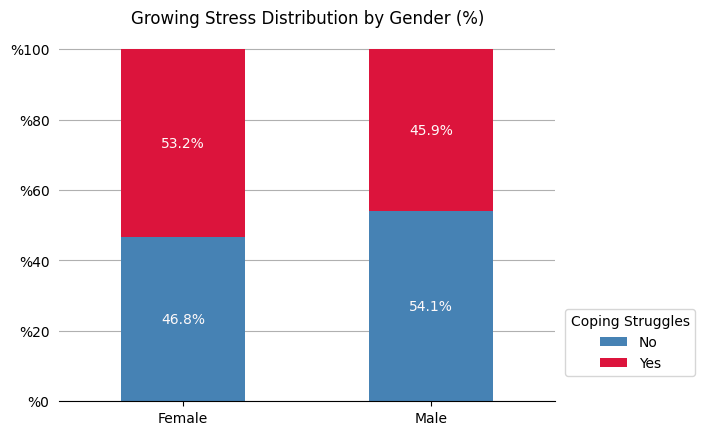

In [64]:
# Does gender influence the choice of coping strategies for daily problems or stress?
# Create the pivot table
pivot_table = df.pivot_table(index="Gender", columns="Coping_Struggles", aggfunc="size")
# Calculate percentiles by gender
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Place the axis below (allows grid lines to appear in front)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Gender (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Coping Struggles")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=10)

plt.show()

Hypothesis

H0: There is no relationship between Gender and Coping Struggles

HA: There is a significant relationship between Gender and Coping Struggles

Statistical Test
Chi-squared test

In [66]:
crosstab = pd.crosstab(df["Gender"], df["Coping_Struggles"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"""Reject the null hypothesis - Statistically significant relationship - \n 
It indicates that gender has a notable impact on individuals' ability to cope with daily problems or stress. """)
else:
    print(f"Fail to reject the null hypothesis - No statistically significant relationship - ")

Chi-squared value: 4.124505784235549
P-value: 0.04226636445747966
Reject the null hypothesis - Statistically significant relationship - 
 
It indicates that gender has a notable impact on individuals' ability to cope with daily problems or stress. 
